In [1]:
import numpy as np
from tqdm import tqdm
import os

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K 
import math

In [2]:
train_x = []
train_y = []
eval_x = []
eval_y = []

In [3]:
csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
    for line in tqdm(f.read().splitlines()[1:]):
        emotion, pixels, usage = line.split(',')
    
        x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
        y = int(emotion)

        if usage == 'PrivateTest':
            eval_x.append(x)
            eval_y.append(y)
        else:
            train_x.append(x)
            train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:23<00:00, 1537.35it/s]

train : 32298, eval :3589


Angry


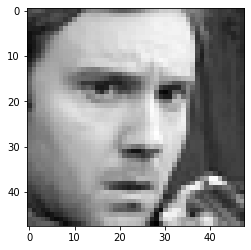

In [4]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best.h5', monitor='val_categorical_accuracy', verbose=1, mode='auto', save_best_only=True)

In [6]:
# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
hist = model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=150,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)),
         callbacks=[mc])

Epoch 1/150
64/64 [==============================] - ETA: 0s - loss: 1.8216 - categorical_accuracy: 0.2457
Epoch 00001: val_categorical_accuracy improved from -inf to 0.24492, saving model to best.h5
64/64 [==============================] - 56s 870ms/step - loss: 1.8216 - categorical_accuracy: 0.2457 - val_loss: 1.9295 - val_categorical_accuracy: 0.2449
Epoch 2/150
63/64 [============================>.] - ETA: 0s - loss: 1.6815 - categorical_accuracy: 0.3254
Epoch 00002: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 88ms/step - loss: 1.6813 - categorical_accuracy: 0.3255 - val_loss: 1.9158 - val_categorical_accuracy: 0.2449
Epoch 3/150
63/64 [============================>.] - ETA: 0s - loss: 1.5649 - categorical_accuracy: 0.3869
Epoch 00003: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 87ms/step - loss: 1.5652 - categorical_accuracy: 0.3868 - val_loss: 1.8997 - val_categorical_accur

Epoch 26/150
63/64 [============================>.] - ETA: 0s - loss: 0.3863 - categorical_accuracy: 0.8622
Epoch 00026: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 89ms/step - loss: 0.3866 - categorical_accuracy: 0.8621 - val_loss: 2.0765 - val_categorical_accuracy: 0.1655
Epoch 27/150
63/64 [============================>.] - ETA: 0s - loss: 0.3674 - categorical_accuracy: 0.8714
Epoch 00027: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 89ms/step - loss: 0.3676 - categorical_accuracy: 0.8713 - val_loss: 2.0993 - val_categorical_accuracy: 0.1655
Epoch 28/150
63/64 [============================>.] - ETA: 0s - loss: 0.3447 - categorical_accuracy: 0.8772
Epoch 00028: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 88ms/step - loss: 0.3449 - categorical_accuracy: 0.8771 - val_loss: 2.1270 - val_categorical_accuracy: 0.1655
Epoch 29/150


Epoch 51/150
63/64 [============================>.] - ETA: 0s - loss: 0.0950 - categorical_accuracy: 0.9674
Epoch 00051: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 88ms/step - loss: 0.0951 - categorical_accuracy: 0.9674 - val_loss: 2.3855 - val_categorical_accuracy: 0.1744
Epoch 52/150
63/64 [============================>.] - ETA: 0s - loss: 0.1666 - categorical_accuracy: 0.9413
Epoch 00052: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 88ms/step - loss: 0.1673 - categorical_accuracy: 0.9411 - val_loss: 2.4036 - val_categorical_accuracy: 0.1744
Epoch 53/150
63/64 [============================>.] - ETA: 0s - loss: 0.2357 - categorical_accuracy: 0.9180
Epoch 00053: val_categorical_accuracy improved from 0.24492 to 0.26330, saving model to best.h5
64/64 [==============================] - 6s 93ms/step - loss: 0.2355 - categorical_accuracy: 0.9180 - val_loss: 2.3068 - val_categorical_a

63/64 [============================>.] - ETA: 0s - loss: 0.0910 - categorical_accuracy: 0.9683
Epoch 00075: val_categorical_accuracy improved from 0.33157 to 0.33213, saving model to best.h5
64/64 [==============================] - 6s 89ms/step - loss: 0.0913 - categorical_accuracy: 0.9682 - val_loss: 3.2207 - val_categorical_accuracy: 0.3321
Epoch 76/150
63/64 [============================>.] - ETA: 0s - loss: 0.1767 - categorical_accuracy: 0.9394
Epoch 00076: val_categorical_accuracy improved from 0.33213 to 0.33798, saving model to best.h5
64/64 [==============================] - 6s 88ms/step - loss: 0.1771 - categorical_accuracy: 0.9393 - val_loss: 3.3252 - val_categorical_accuracy: 0.3380
Epoch 77/150
63/64 [============================>.] - ETA: 0s - loss: 0.1479 - categorical_accuracy: 0.9489
Epoch 00077: val_categorical_accuracy did not improve from 0.33798
64/64 [==============================] - 5s 84ms/step - loss: 0.1480 - categorical_accuracy: 0.9489 - val_loss: 3.2422 - v

Epoch 99/150
63/64 [============================>.] - ETA: 0s - loss: 0.1311 - categorical_accuracy: 0.9546
Epoch 00099: val_categorical_accuracy did not improve from 0.43550
64/64 [==============================] - 5s 84ms/step - loss: 0.1312 - categorical_accuracy: 0.9545 - val_loss: 5.3185 - val_categorical_accuracy: 0.4280
Epoch 100/150
63/64 [============================>.] - ETA: 0s - loss: 0.1243 - categorical_accuracy: 0.9576
Epoch 00100: val_categorical_accuracy did not improve from 0.43550
64/64 [==============================] - 5s 85ms/step - loss: 0.1243 - categorical_accuracy: 0.9575 - val_loss: 5.2377 - val_categorical_accuracy: 0.4185
Epoch 101/150
63/64 [============================>.] - ETA: 0s - loss: 0.1079 - categorical_accuracy: 0.9644
Epoch 00101: val_categorical_accuracy did not improve from 0.43550
64/64 [==============================] - 5s 84ms/step - loss: 0.1079 - categorical_accuracy: 0.9644 - val_loss: 4.9846 - val_categorical_accuracy: 0.4196
Epoch 102/1

Epoch 124/150
63/64 [============================>.] - ETA: 0s - loss: 0.0661 - categorical_accuracy: 0.9771
Epoch 00124: val_categorical_accuracy did not improve from 0.43550
64/64 [==============================] - 5s 84ms/step - loss: 0.0665 - categorical_accuracy: 0.9770 - val_loss: 5.9264 - val_categorical_accuracy: 0.3848
Epoch 125/150
63/64 [============================>.] - ETA: 0s - loss: 0.0789 - categorical_accuracy: 0.9724
Epoch 00125: val_categorical_accuracy did not improve from 0.43550
64/64 [==============================] - 5s 84ms/step - loss: 0.0789 - categorical_accuracy: 0.9724 - val_loss: 6.1622 - val_categorical_accuracy: 0.3842
Epoch 126/150
63/64 [============================>.] - ETA: 0s - loss: 0.0339 - categorical_accuracy: 0.9886
Epoch 00126: val_categorical_accuracy did not improve from 0.43550
64/64 [==============================] - 5s 84ms/step - loss: 0.0339 - categorical_accuracy: 0.9886 - val_loss: 5.5926 - val_categorical_accuracy: 0.3742
Epoch 127/

Epoch 149/150
63/64 [============================>.] - ETA: 0s - loss: 0.0740 - categorical_accuracy: 0.9743
Epoch 00149: val_categorical_accuracy did not improve from 0.43550
64/64 [==============================] - 5s 84ms/step - loss: 0.0740 - categorical_accuracy: 0.9743 - val_loss: 6.0809 - val_categorical_accuracy: 0.4043
Epoch 150/150
63/64 [============================>.] - ETA: 0s - loss: 0.0729 - categorical_accuracy: 0.9742
Epoch 00150: val_categorical_accuracy did not improve from 0.43550
64/64 [==============================] - 5s 84ms/step - loss: 0.0729 - categorical_accuracy: 0.9742 - val_loss: 6.3041 - val_categorical_accuracy: 0.3931


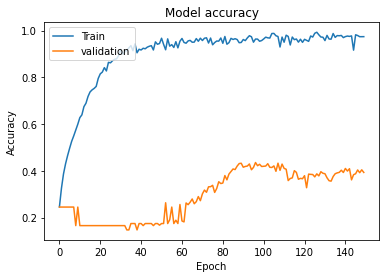

In [7]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [8]:
import os
os.path.exists('best.h5')

True